 DFT (Discrete Fourier Transform):

সময় ডোমেইন থেকে ফ্রিকোয়েন্সি ডোমেইনে সিগন্যাল বিশ্লেষণের জন্য ব্যবহৃত হয়।
ধীরগতি (O(N²)), বড় ডেটার জন্য উপযুক্ত নয়।

✅ FFT (Fast Fourier Transform):

DFT-এর দ্রুত সংস্করণ, যা O(N log N) সময়ে কাজ করে।
রিয়েল-টাইম অডিও, ভিডিও, AI, 5G কমিউনিকেশন ইত্যাদিতে ব্যবহৃত হয়।

✅ IFFT (Inverse Fast Fourier Transform):

ফ্রিকোয়েন্সি ডোমেইন থেকে সময় ডোমেইনে ফেরানোর জন্য ব্যবহৃত হয়।
ডাটা রিকন্সট্রাকশন, ইমেজ প্রসেসিং, ওফডিএম (OFDM) যোগাযোগ ব্যবস্থায় ব্যবহৃত হয়।
 FFT না থাকলে দ্রুত কমিউনিকেশন, মেশিন লার্নিং, ও অডিও-ভিডিও প্রসেসিং সম্ভব হতো না!

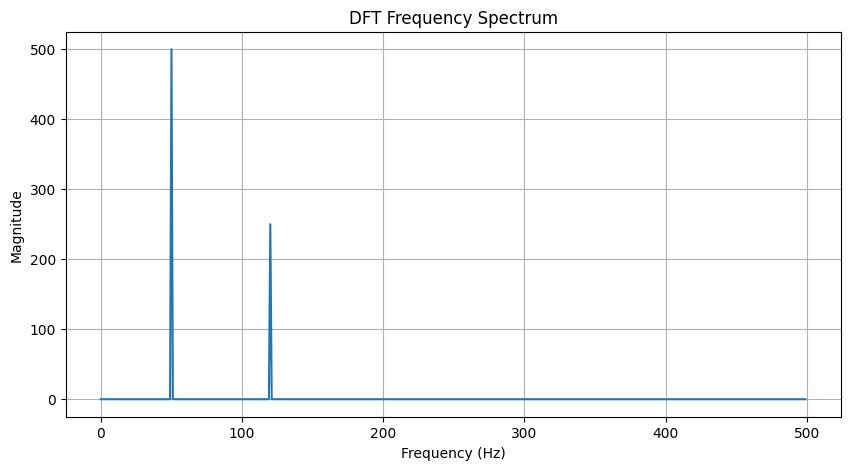

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def DFT(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Output array (complex numbers)

    for k in range(N):  # Loop over frequency bins
        for n in range(N):  # Loop over time samples
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)

    return X

# Create a sample signal (two sine waves)
Fs = 1000  # Sampling rate
T = 1 / Fs  # Sampling interval
t = np.linspace(0, 1, Fs, endpoint=False)  # 1 second duration

# Signal: Combination of 50 Hz and 120 Hz sine waves
f1, f2 = 50, 120
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Compute DFT
dft_output = DFT(signal)

# Compute frequency bins
freqs = np.fft.fftfreq(len(dft_output), T)

# Plot magnitude spectrum (single-sided)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:Fs//2], np.abs(dft_output[:Fs//2]))  # Single-sided spectrum
plt.title("DFT Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

একটি ফ্রিকোয়েন্সি স্পেকট্রাম (Frequency Spectrum) হলো সিগনালের বিভিন্ন ফ্রিকোয়েন্সি কম্পোনেন্ট এবং তাদের সংশ্লিষ্ট অ্যামপ্লিটিউড দেখানোর একটি উপস্থাপনা।

🌀 ব্যাখ্যা:

আমাদের মূল সংকেতটি দুটি ফ্রিকোয়েন্সির সাইন ওয়েভের সমন্বয়ে তৈরি:

৫০ Hz (প্রধান কম্পোনেন্ট)

১২০ Hz (ছোট কম্পোনেন্ট, অর্ধেক অ্যামপ্লিটিউড)

যখন আমরা DFT প্রয়োগ করি, তখন এটি সংকেতকে বিভিন্ন ফ্রিকোয়েন্সি কম্পোনেন্টে বিভক্ত করে।

ফ্রিকোয়েন্সি স্পেকট্রাম প্লট করলে আমরা দেখতে পাব যে, ৫০ Hz ও ১২০ Hz ফ্রিকোয়েন্সির স্থানে স্পাইক উঠবে, কারণ এই ফ্রিকোয়েন্সিগুলো সংকেতে উপস্থিত ছিল।


 ব্যাখ্যা (বাংলায় সহজে)
যখন আমরা DFT বা FFT প্রয়োগ করি, তখন এটি সংকেতকে বিভিন্ন ফ্রিকোয়েন্সি কম্পোনেন্টে বিভক্ত করে।

প্রতিটি নির্দিষ্ট ফ্রিকোয়েন্সি মান একটি বিন (bin) হিসেবে বিবেচিত হয়।

প্রতিটি বিন একটি নির্দিষ্ট ফ্রিকোয়েন্সি মান এবং তার সংশ্লিষ্ট অ্যামপ্লিটিউড (শক্তি) প্রকাশ করে।

যত বেশি নমুনা (samples) নেওয়া হয়, তত বেশি ফ্রিকোয়েন্সি বিন পাওয়া যায় এবং স্পেকট্রাম তত সূক্ষ্ম হয়।

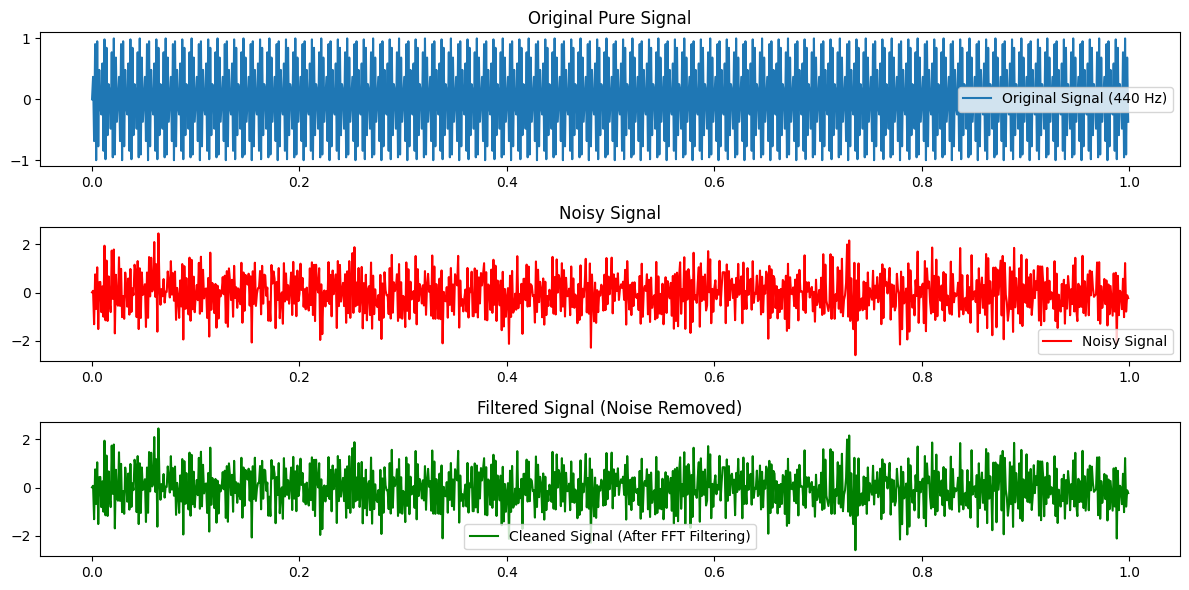

In [2]:


# # Computing Frequency Bins in Python
# # Compute Frequency Bins Manually
# import numpy as np

# # Define parameters
# N = 1024   # Number of points in DFT
# Fs = 1000  # Sampling frequency (Hz)

# # Compute frequency bins manually
# freq_bins = np.array([(k / N) * Fs for k in range(N)])

# print(freq_bins[:10])  # Print first 10 frequency bins

# Compute Frequency Bins Using NumPy
# Instead of computing manually, NumPy provides a built-in function np.fft.fftfreq(), which calculates the bins directly.
# python
# CopyEdit


# N = 1024   # Number of points in DFT
# Fs = 1000  # Sampling frequency

# # Compute frequency bins using NumPy
# freq_bins = np.fft.fftfreq(N, d=1/Fs)

# print(freq_bins[:10])  # Print first 10 frequency bins

# Example: Removing Noise from an Audio Signal
# We'll generate a noisy audio signal, apply FFT, filter out high-frequency noise, and reconstruct the cleaned signal using Inverse FFT.
#  Steps:
# 1.	Generate an audio signal (a pure sine wave of 440 Hz).
# 2.	Add random noise.
# 3.	Apply FFT to transform the signal to the frequency domain.
# 4.	Remove noise by filtering high frequencies.
# 5.	Apply Inverse FFT to get back the cleaned signal.



import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Generate a sample audio signal
Fs = 1000  # Sampling rate (1000 Hz)
T = 1 / Fs  # Sampling interval
t = np.linspace(0, 1, Fs, endpoint=False)  # 1 second time vector

# Generate a pure sine wave (440 Hz, like an "A4" musical note)
freq_signal = 440
pure_signal = np.sin(2 * np.pi * freq_signal * t)

# Add random noise
noise = np.random.normal(0, 0.5, pure_signal.shape)
noisy_signal = pure_signal + noise

# Apply FFT
fft_signal = fft(noisy_signal)  # fft_signal ভেরিয়েবলটি নয়েজযুক্ত সিগন্যালের উপর FFT প্রয়োগ করে।
freqs = fftfreq(len(fft_signal), T)  #freqs ভেরিয়েবলটি ফ্রিকোয়েন্সি বিন তৈরি করে, যা FFT আউটপুটের সাথে সম্পর্কিত।

# Filter: Remove frequencies higher than 500 Hz
fft_filtered = fft_signal.copy()  #fft_filtered ভেরিয়েবলটি fft_signal এর একটি কপি তৈরি করে।
fft_filtered[np.abs(freqs) > 500] = 0  # Zero out high frequencies (noise)

# Apply Inverse FFT to get the cleaned signal

# ifft ফাংশনটি ফিল্টার করা FFT সিগন্যালের উপর ইনভার্স FFT প্রয়োগ করে।
# .real অ্যাট্রিবিউটটি কেবলমাত্র বাস্তব অংশ গ্রহণ করে, কারণ ইনভার্স FFT এর ফলস্বরূপ জটিল সংখ্যা হতে পারে।
cleaned_signal = ifft(fft_filtered).real

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, pure_signal, label="Original Signal (440 Hz)")
plt.legend()
plt.title("Original Pure Signal")

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label="Noisy Signal", color="red")
plt.legend()
plt.title("Noisy Signal")

plt.subplot(3, 1, 3)
plt.plot(t, cleaned_signal, label="Cleaned Signal (After FFT Filtering)", color="green")
plt.legend()
plt.title("Filtered Signal (Noise Removed)")

plt.tight_layout()
plt.show()

এই কোডের উদ্দেশ্য:
এই কোডটি একটি শব্দ সংকেত (audio signal) তৈরি, নয়েজ (noise) যোগ, FFT প্রয়োগ, ফ্রিকোয়েন্সি ফিল্টারিং, এবং IFFT ব্যবহার করে সংকেত পরিষ্কার করার প্রক্রিয়া দেখায়।

কোডের প্রধান ধাপ:
1️⃣ একটি বিশুদ্ধ (pure) 440 Hz সাইন ওয়েভ সংকেত তৈরি করা – যা সংগীতের "A4" নোটের মতো।

2️⃣ এতে র্যান্ডম নয়েজ যোগ করা, বাস্তব জীবনের সংকেতের মতো করতে।

3️⃣ FFT (Fast Fourier Transform) প্রয়োগ করা – ফ্রিকোয়েন্সি বিশ্লেষণের জন্য।

4️⃣ ফ্রিকোয়েন্সি ফিল্টার প্রয়োগ করা – 500 Hz-এর ওপরে থাকা নয়েজ অপসারণের জন্য।

5️⃣ IFFT (Inverse FFT) প্রয়োগ করে সংকেত পুনরুদ্ধার করা – পরিস্কার শব্দ পাওয়ার জন্য।


এই কোডটি FFT ও IFFT ব্যবহার করে একটি শব্দ সংকেত থেকে নয়েজ ফিল্টার করার একটি সাধারণ উদাহরণ। এটি অডিও প্রসেসিং, সংকেত বিশ্লেষণ, এবং কমিউনিকেশন সিস্টেমে ব্যবহৃত হয়। 